In [5]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 

sns.reset_orig()
plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*cutbinarised.npy')) #list - 30 minute binarised trace
nnblist = sorted(glob.glob('*_nnb.npy')) #list - nearest neighbour matrix

itbinlist = sorted(glob.glob('*.*binarised*')) #iterated list - binarised trace
itnnblist = sorted(glob.glob('*.*nnb.npy*')) #iterated list - nearest neighbour matrix

swpkg =  sorted(glob.glob('*-02*nnbpkg*')) 
swav =  sorted(glob.glob('*-02*nnbav*')) 

In [ ]:
swav

In [ ]:
itbinlist

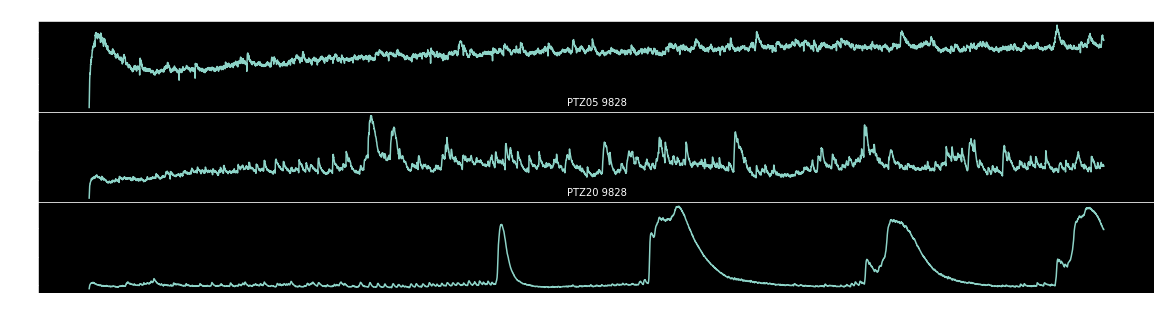

In [3]:
# PLOT - average whole brain fluorescence
#----------------------------------------
deltalist = sorted(glob.glob('*E-12*_deltaff.npy'))
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)
for i in range(len(deltalist)):
    me = np.load(deltalist[i])
    axarr[i].set_title(deltalist[i][deltalist[i].find('dpf')+4:deltalist[i].find('run')-1] + ' ' + str(me.shape[1]), size = 10)
    new = np.apply_along_axis(np.mean, 0, me)
    axarr[i].plot(new)

plt.show()

## PLOT1
### How do parameter combinations effect power law distributions (changes in firing and avalanche neighbour binning) - exponent and log likelihood ratio

In [209]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
sweep2 = sorted(glob.glob('*paramsweep*')) #iterated list - binarised trace
sweep2

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_paramsweep.npy']

In [ ]:
import powerlaw

cutoff = 3
paramar = np.zeros((len(swav), 6))
for i in range(len(swav)):
    data = np.load(swav[i])[0]
    cells = np.load(nnblist[3]).shape[0]
    maxi = np.max(np.unique(data, return_counts = True)[0][np.unique(data, return_counts = True)[1] > cutoff])
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    paramar[i,0] = R
    paramar[i,1] = p
    paramar[i,2] = alpha
    paramar[i,3] = sigma
    paramar[i,4] = maxi
    paramar[i,5] = maxi/cells

np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[0][:nnblist[0].find('run')+6] + '_' + 'paramsweep.npy', paramar)


### Define new parameter sweeps - range of values

In [54]:
np.load(sweep2[0]).shape

(420, 6)

In [55]:
data = np.load(sweep2[0])[:,2]

In [150]:
nnblab = np.linspace(0.01, 0.2, 20)
nnblab

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [157]:
binlab = np.linspace(0.4, 0.7, 21)
binlab

array([0.4  , 0.415, 0.43 , 0.445, 0.46 , 0.475, 0.49 , 0.505, 0.52 ,
       0.535, 0.55 , 0.565, 0.58 , 0.595, 0.61 , 0.625, 0.64 , 0.655,
       0.67 , 0.685, 0.7  ])

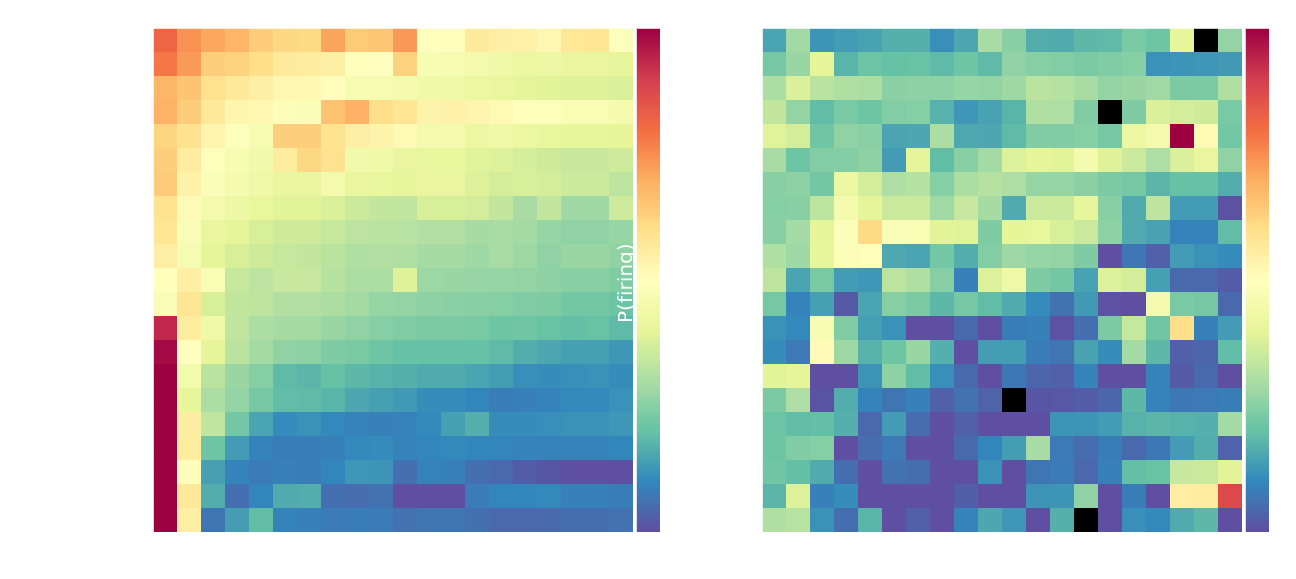

In [201]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, axarr = plt.subplots(1,2,figsize = (20,20))
data = np.load(sweep2[0])[:,2]
data = data.reshape((21,20))
plot1 = axarr[0].imshow(data, cmap = 'Spectral_r', vmin = 2, vmax = 6)
axarr[0].set_title('exponent', size = '20')
axarr[0].set_xlabel('nnb', size = '20')
axarr[0].set_ylabel('P(firing)', size = '20')
axarr[0].set_yticklabels(binlab)
axarr[0].locator_params(axis='y', nbins=21)
axarr[0].set_xticklabels(nnblab)
axarr[0].locator_params(axis='x', nbins=20)

data = np.load(sweep2[0])[:,0]
data = data.reshape((21,20))
plot2 = axarr[1].imshow(data, cmap = 'Spectral_r', vmin = 0)
axarr[1].set_title('loglikelihood ratio', size = '20')
axarr[1].set_xlabel('nnb', size = '20')
axarr[1].set_ylabel('P(firing)', size = '20')
axarr[1].set_yticklabels(binlab)
axarr[1].locator_params(axis='y', nbins=21)
axarr[1].set_xticklabels(nnblab)
axarr[1].locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
divider = make_axes_locatable(axarr[1])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar1 = f.colorbar(plot2, cax=cax1)

#norm = mpl.colors.Normalize(vmin=5, vmax=10)
#ax.pcolormesh(x, y, Z, vmin=-1., vmax=1., cmap='RdBu_r')

plt.show()

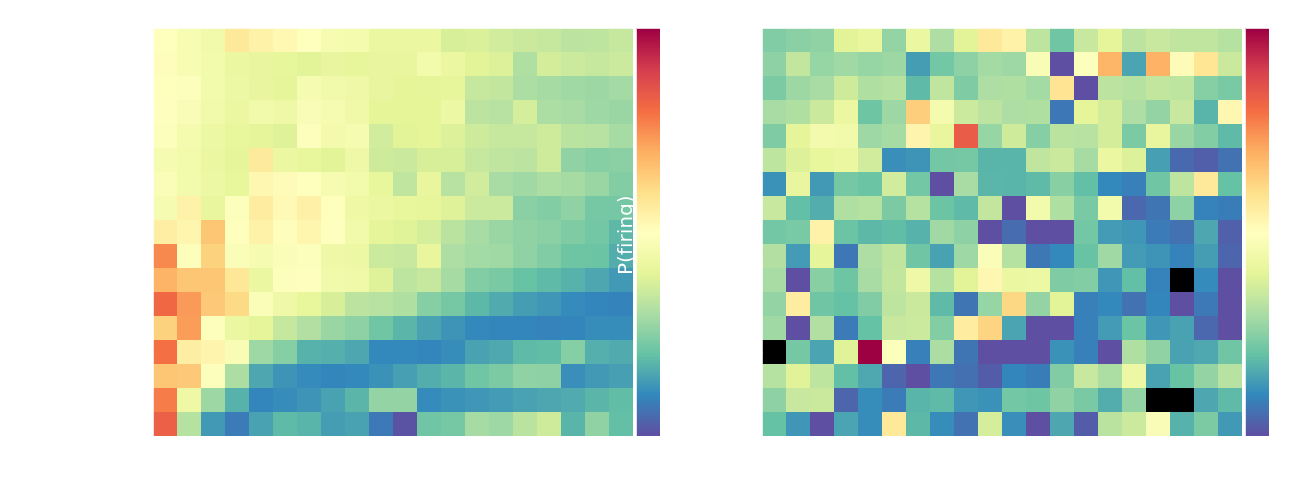

In [218]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, axarr = plt.subplots(1,2,figsize = (20,20))
data = np.load(sweep2[0])[:,2]
data = data.reshape((17,20))
plot1 = axarr[0].imshow(data, cmap = 'Spectral_r', vmin = 2, vmax = 6)
axarr[0].set_title('exponent', size = '20')
axarr[0].set_xlabel('nnb', size = '20')
axarr[0].set_ylabel('P(firing)', size = '20')
axarr[0].set_yticklabels(binlab)
axarr[0].locator_params(axis='y', nbins=21)
axarr[0].set_xticklabels(nnblab)
axarr[0].locator_params(axis='x', nbins=20)

data = np.load(sweep2[0])[:,0]
data = data.reshape((17,20))
plot2 = axarr[1].imshow(data, cmap = 'Spectral_r', vmin = 0)
axarr[1].set_title('loglikelihood ratio', size = '20')
axarr[1].set_xlabel('nnb', size = '20')
axarr[1].set_ylabel('P(firing)', size = '20')
axarr[1].set_yticklabels(binlab)
axarr[1].locator_params(axis='y', nbins=21)
axarr[1].set_xticklabels(nnblab)
axarr[1].locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
divider = make_axes_locatable(axarr[1])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar1 = f.colorbar(plot2, cax=cax1)

#norm = mpl.colors.Normalize(vmin=5, vmax=10)
#ax.pcolormesh(x, y, Z, vmin=-1., vmax=1., cmap='RdBu_r')

plt.show()

In [ ]:
f, axarr = plt.subplots(figsize = (10,10))
data = np.load(param[0])[:,2]
data = data.reshape((21,20))
plt.imshow(data, cmap = 'Spectral_r')
plt.clim( vmin=1, vmax=4)
plt.colorbar()
plt.title('exponent')
plt.show()

## PLOT2
### AVALANCHE SIZE, DURATION AND SIZE VS DURATION
### Baseline distributions and their null models

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


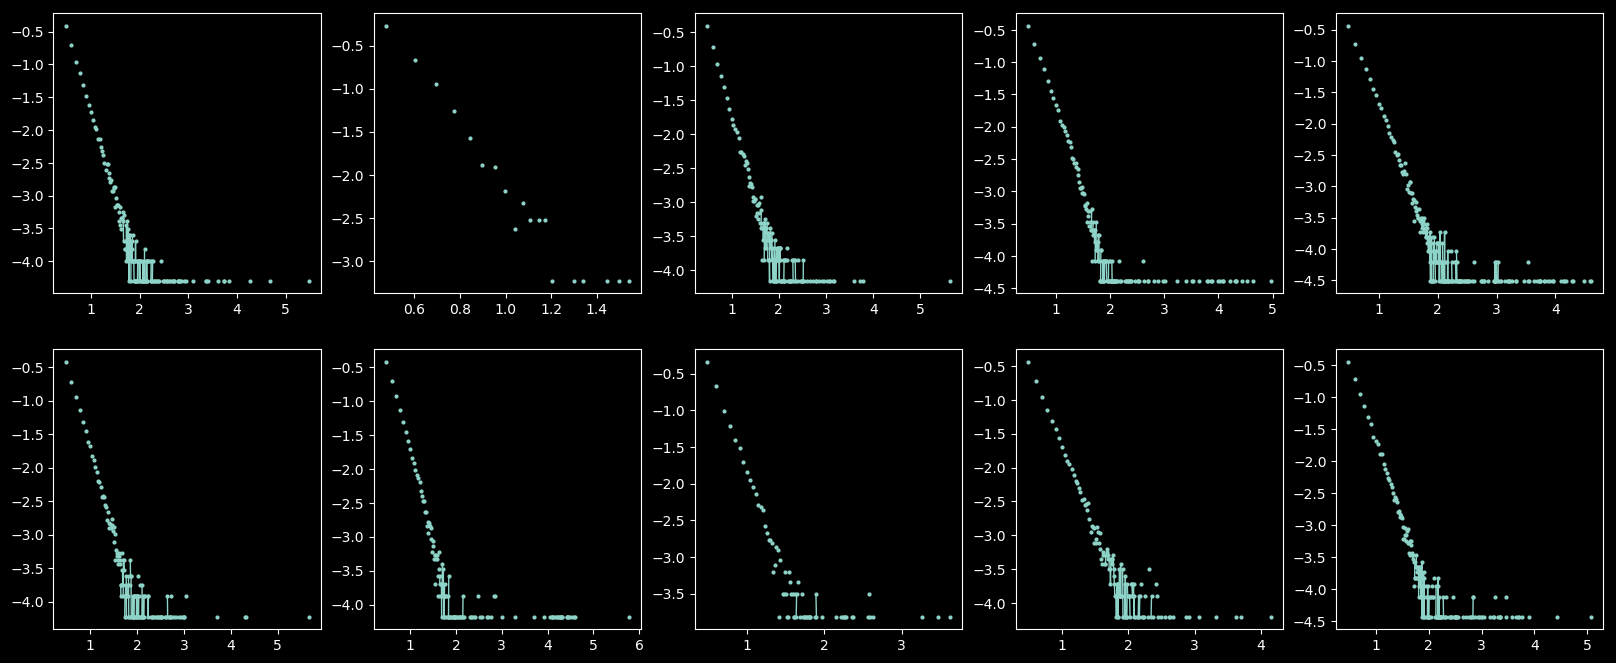

In [20]:
f, axarr = plt.subplots(2,5,figsize = (20,8))
yco = 0
xco = 0
for i in range(len(avlist)-1):
    if i == 5:
        xco = 0
        yco = 1
    avdistcut = np.load(avlist[i])[0]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[yco,xco].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2)
    xco+=1

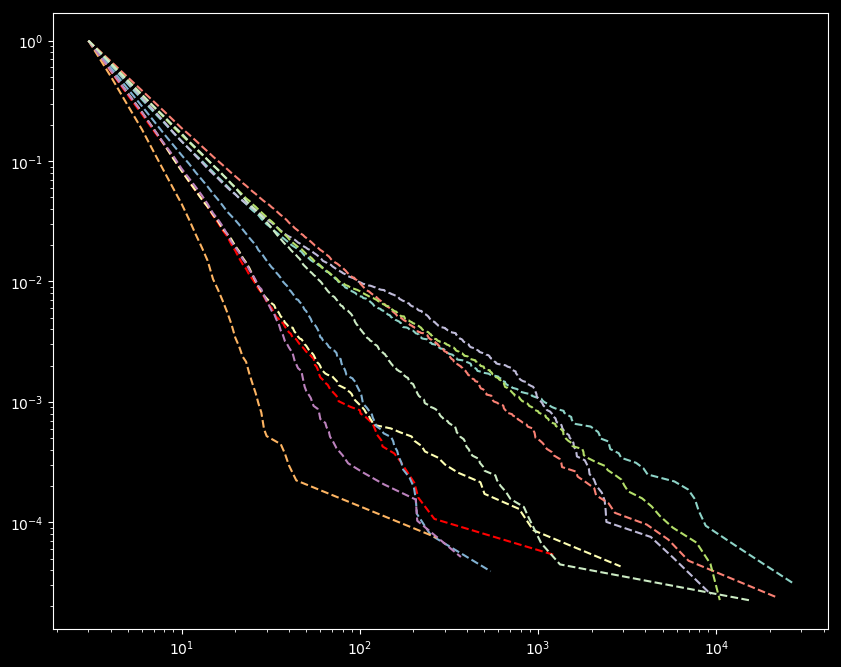

In [21]:
import powerlaw
avdistcut = np.load(BLNavlist[5])[0]
f, axarr = plt.subplots(figsize = (10,8))
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, c = 'r', linestyle = '--')
avdistcut = np.load(BLNavlist[0])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[4])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[3])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[2])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[6])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[7])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[8])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[9])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
avdistcut = np.load(BLNavlist[10])[0]
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')

#plt.savefig('powerlaws.svg', transparent = True)


### fit power laws - quantify
### critical exponents

In [ ]:
import powerlaw

cutoff = 3
cutofflist = list(range(len(P20avlist)))
for i in range(len(P20avlist)):
    data = np.load(P20avlist[i])[0]
    #cells = np.load(nnblist[i]).shape[0]
    
    maxi = np.max(np.unique(data, return_counts = True)[0][np.unique(data, return_counts = True)[1] > cutoff])
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    alpha = fit.power_law.alpha
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p) + ' alpha =  ' + str(alpha)) #+ ' cellfraction = ' + str(maxi/cells) )
    
    

### Branching ratio

In [ ]:
#CALCULATE BRANCHING RATIO

import numpy as np
import os
    
branchlist = list(range(len(pkglist)))
    
for y in range(len(pkglist)):
    pkg = np.load(pkglist[y])[3000:4000]
    brancharr = np.zeros((np.int(np.max(pkg)), np.max(np.load(avlist[y])[1])))
    #brancharr = np.zeros((np.load(avlist[y])[1].shape[0], np.max(np.load(avlist[y])[1]))) #empty array of size: number of avalanches x max number of frames
    #indexlist = np.unique(pkg)[np.where(np.unique(pkg,return_counts = True)[1][1:] >=3)[0]] #list of all avalanche marker values >=3, ordered - index can be used for filling brancharr in order
    i = 0
        
    for t in range(pkg.shape[1]): #loop through all time points
        if t == pkg.shape[1]-1:
            break
        n1 = np.unique(pkg[:,t])  #unique marker values at each time point
        n2 = np.unique(pkg[:,t+1]) 
        nx = np.intersect1d(n1, n2) #marker values that continue to next time frame
    
        if i% round(10*pkg.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(pkg.shape[1]) + ' for fish ' + str(y))
        i = i+1

        for mark in nx[1:]: #loop through each marker value at this time point (only if marker active in next time point)
            mark = np.int(mark)
            ancestor = np.unique(pkg[:,t], return_counts = True)[1][np.where(np.unique(pkg[:,t], return_counts = True)[0] == mark)[0]][0] #number of cells in that avalanche for that marker value at time point t  
            descend = np.unique(pkg[:,t+1], return_counts = True)[1][np.where(np.unique(pkg[:,t+1], return_counts = True)[0] == mark)[0]][0] #same as above for next time point
            #index = np.where(indexlist == mark)[0] #find index in brancharr list
            brancharr[mark, np.where(brancharr[mark] == 0)[0][0]] = (descend/ancestor)
    branchlist[y] = np.mean(brancharr[np.where(brancharr > 0)])